<a href="https://colab.research.google.com/github/jfcaro/Aforos-Trafico-Madrid/blob/master/Aforos_trafico_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aforos tráfico Madrid

Análisis del tráfico en Madrid en base a aforos permanentes en la ciudad

fuente: https://bit.ly/2WeNWy6

descripcion: https://bit.ly/2KRHnfI

@jfrcaro

In [0]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Diccionarios
# lectura = dataframe por mes 
# meses = meses y código de fichero a descargar

lectura={}
meses = { 'Enero':27, 'Febrero':29, 'Marzo':31, 'Abril': 33, 'Mayo':35, 'Junio':37, 'Julio':39, 'Agosto':41, 'Septiembre':43, 'Octubre':45, 'Noviembre':47, 'Diciembre':49, 'Marzo2020':54}

In [0]:
# Se cargan datos mensuales de fuente (1 fichero por mes)

for mes in meses:
    lectura[mes] =pd.read_csv('https://datos.madrid.es/egob/catalogo/300233-'+ str(meses[mes])+'-aforo-trafico-permanentes.csv', sep =';')
    

In [32]:
# Analisis dataframe
lectura['Enero'].describe()

,HOR1,HOR2,HOR3,HOR4,HOR5,HOR6,HOR7,HOR8,HOR9,HOR10,HOR11,HOR12
count,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000
mean,655.959404,641.330645,593.258748,581.566976,591.597321,682.815610,861.711728,976.372335,940.509431,822.898715,752.796063,693.097731
std,960.669383,995.999343,1063.079843,1102.205005,1025.177950,1013.146651,1099.172615,1234.464007,1233.987390,1183.492757,1103.298268,973.534589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,77.750000,59.000000,54.000000,63.000000,132.000000,211.750000,260.000000,285.000000,261.000000,217.000000,173.000000
50%,358.500000,317.500000,264.000000,227.500000,250.000000,388.000000,586.000000,674.000000,618.000000,521.000000,451.000000,418.000000
75%,843.000000,857.250000,753.000000,726.250000,774.250000,871.000000,1118.250000,1275.250000,1146.000000,942.250000,874.000000,849.250000
max,9771.000000,9621.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000


In [33]:
# Primeros datos del dataframe
lectura['Enero'].head(5)

,FDIA,FEST,FSEN,HOR1,HOR2,HOR3,HOR4,HOR5,HOR6,HOR7,HOR8,HOR9,HOR10,HOR11,HOR12
0,01/01/19,ES01,1-,1527,1169,730,415,428,473,348,218,182,187,341,484
1,01/01/19,ES01,1=,681,764,458,633,742,1006,1053,1120,1022,801,553,348
2,01/01/19,ES01,2-,1093,947,533,363,358,387,365,231,179,231,367,504
3,01/01/19,ES01,2=,610,637,481,570,742,883,885,777,578,416,313,260
4,01/01/19,ES02,1-,649,649,506,353,231,240,265,167,186,172,256,320


In [0]:
# Como los datos vienen por sentido se selecciona un sentido para cálculos en FSEN 
# Como los datos vienen en 12 horas se obtienen dos vectores 1-12 horas y 13-24 horas

# Diccionario Suma112 espira virtual con la suma del tráfico / número total de espiras en franja horaria 1-12horas
suma112 = {}

# Diccionario Suma1324 espira virtual con la suma del tráfico / número total de espiras en franja horaria 13-24horas
suma1324 ={}

# Diccionario concatenación 1-12 horas y 13-24
suma = {}

# Diccionario total espiras por mes 
total_espiras ={}

for mes in meses:
    
    total_espiras[mes] =len (lectura[mes][lectura[mes]['FSEN']=='1-'])
    suma112[mes]=lectura[mes][lectura[mes]['FSEN']=='1-'].sum().to_numpy()
    suma1324[mes] = lectura[mes][lectura[mes]['FSEN']=='1='].sum().to_numpy()
    # en marzo 2020 cambia el formato del fichero
    if mes == 'Marzo2020':
        suma[mes] = np.concatenate((suma112[mes][3:15], suma1324[mes][3:15]))
    else:
        suma[mes] = np.concatenate((suma112[mes][3:], suma1324[mes][3:]))
    suma[mes]= suma[mes]/total_espiras[mes]

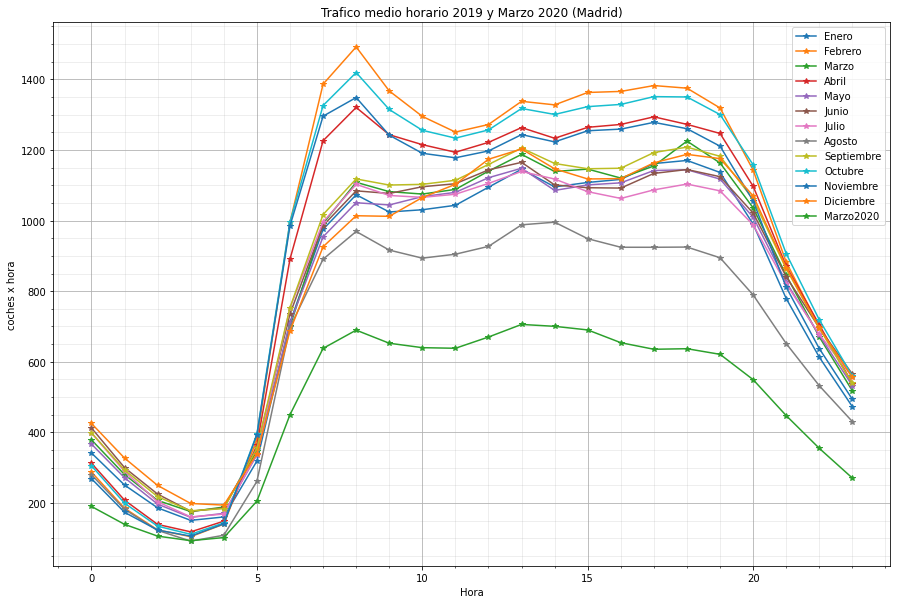

In [35]:
# Representación datos

plt.figure(figsize=(15,10))
for mes in meses:   
    plt.plot(suma[mes], marker ='*', label =mes)
plt.title("Trafico medio horario 2019 y Marzo 2020 (Madrid)")
plt.xlabel("Hora")
plt.ylabel('coches x hora')
plt.legend() 
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


In [36]:
total_agosto = suma['Agosto'].sum()
total_marzo2020 = suma['Marzo2020'].sum()
marzo2020vsagosto2019 = (total_marzo2020/total_agosto )*100
print ('El tráfico de marzo 2020 es un', round(100-marzo2020vsagosto2019,2),'% inferior a agosto 2019')


El tráfico de marzo 2020 es un 29.34 % inferior a agosto 2019
